
CLUSTERING ANALYSIS (K-MEANS)

Dataset loaded: 1000 samples × 26 columns
Features used for clustering: 25

[Finding optimal k using Silhouette Score...]
  k=2: silhouette=0.0624
  k=3: silhouette=0.0575
  k=4: silhouette=0.0611
  k=5: silhouette=0.0616
  k=6: silhouette=0.0618
  k=7: silhouette=0.0630
  k=8: silhouette=0.0599
  k=9: silhouette=0.0611

✅ Optimal number of clusters found: k = 7

Clustering complete. 7 clusters created.

[Evaluation Metrics]
  Silhouette Score       : 0.0630
  Davies–Bouldin Index   : 2.4941  (lower = better)


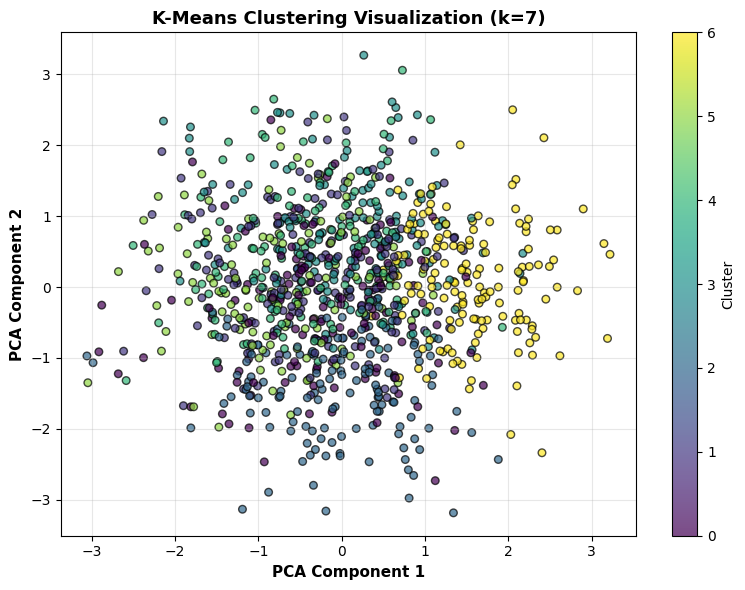

  ✓ Saved: clustering_visualization.png

[Cluster Summary Statistics]
         Watering_Amount_ml  Room_Temperature_C  Soil_Moisture_%  Height_cm  \
Cluster                                                                       
0                     -0.02               -0.58             0.67      -0.40   
1                      0.62               -0.20            -0.13      -0.30   
2                      0.46               -0.85            -0.76       0.82   
3                     -0.54                0.30             0.52       0.28   
4                     -0.42                0.77            -0.46      -0.24   
5                     -0.79               -0.31            -0.71      -0.63   
6                      0.68                0.78             0.61       0.45   

         Humidity_%  Fertilizer_Amount_ml  Leaf_Count  New_Growth_Count  \
Cluster                                                                   
0              0.61                 -0.41       -0.40             -0

In [ ]:
# K-MEANS CLUSTERING ANALYSIS

import pandas as pd                    # For data handling and manipulation
import matplotlib.pyplot as plt        # For visualization
from sklearn.cluster import KMeans     # For K-Means clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score  # For evaluating clustering quality
from sklearn.decomposition import PCA  # For dimensionality reduction (to 2D visualization)

print("\n" + "=" * 70)
print("CLUSTERING ANALYSIS (K-MEANS)")
print("=" * 70)

# STEP 1: Load the Preprocessed Dataset

# Load the clean, preprocessed dataset that you previously generated
df = pd.read_csv("complete_preprocessed_plant_data.csv")

# Since clustering is unsupervised, we only use features (exclude target label 'Health_Score')
X = df.drop(columns=["Health_Score"])

print(f"\nDataset loaded: {df.shape[0]} samples × {df.shape[1]} columns")
print(f"Features used for clustering: {X.shape[1]}")

# STEP 2: Determine the Optimal Number of Clusters (k)

# We'll test different 'k' values (number of clusters) to find which one gives the best silhouette score
silhouette_scores = []
K = range(2, 10)  # Try k = 2 to 9

print("\n[Finding optimal k using Silhouette Score...]")
for k in K:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit model and get cluster assignments
    labels = kmeans.fit_predict(X)
    
    # Compute silhouette score (higher = better separation between clusters)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    
    print(f"  k={k}: silhouette={sil_score:.4f}")

# Select the k with the highest silhouette score
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"\n✅ Optimal number of clusters found: k = {best_k}")

# STEP 3: Fit Final KMeans Model with Optimal k

# Train final K-Means model using the optimal k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)

# Add cluster labels to the dataframe
df['Cluster'] = kmeans.fit_predict(X)

print(f"\nClustering complete. {best_k} clusters created.")

# STEP 4: Evaluate Cluster Quality

# Compute two common clustering metrics:
# 1. Silhouette Score (higher = better)
# 2. Davies–Bouldin Index (lower = better)
silhouette_avg = silhouette_score(X, df['Cluster'])
db_index = davies_bouldin_score(X, df['Cluster'])

print("\n[Evaluation Metrics]")
print(f"  Silhouette Score       : {silhouette_avg:.4f}")
print(f"  Davies–Bouldin Index   : {db_index:.4f}  (lower = better)")

# STEP 5: Visualize Clusters in 2D using PCA

# PCA (Principal Component Analysis) reduces high-dimensional data to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create scatter plot of PCA components colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=df['Cluster'], cmap='viridis', s=30, alpha=0.7, edgecolor='k')

plt.xlabel('PCA Component 1', fontsize=11, fontweight='bold')
plt.ylabel('PCA Component 2', fontsize=11, fontweight='bold')
plt.title(f'K-Means Clustering Visualization (k={best_k})', fontsize=13, fontweight='bold')
plt.colorbar(label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the visualization as a PNG image
plt.savefig('clustering_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("  ✓ Saved: clustering_visualization.png")

# STEP 6: Cluster Summary (Mean Feature Values)

# For each cluster, calculate the mean of each feature (rounded to 2 decimals)
cluster_summary = df.groupby('Cluster').mean().round(2)

print("\n[Cluster Summary Statistics]")
print(cluster_summary)

# STEP 7: Save Final Clustered Dataset

# Export the full dataset with cluster labels added
df.to_csv('clustered_preprocessed_plant_data.csv', index=False)

print("\n  ✓ Saved clustered dataset: clustered_preprocessed_plant_data.csv")
print("=" * 70)

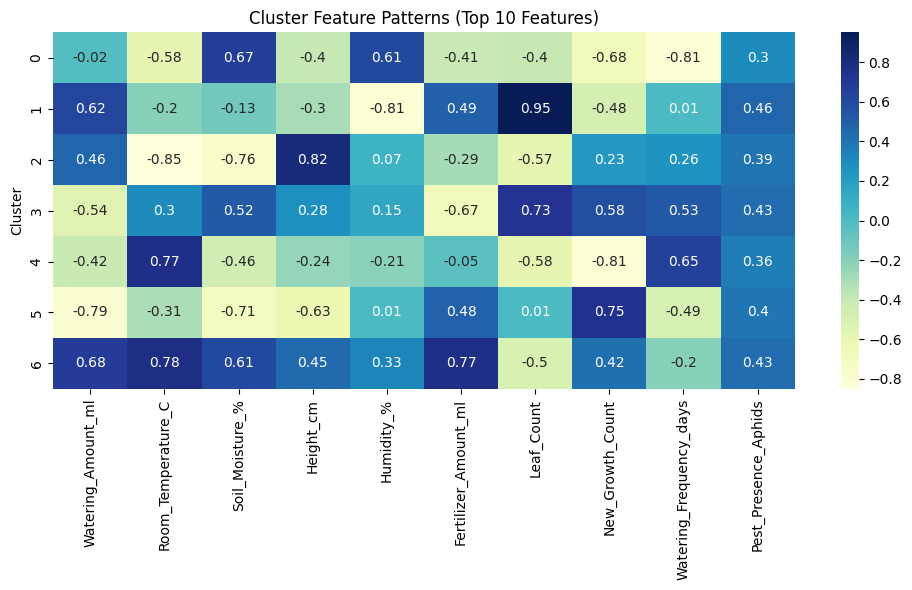

In [4]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary.iloc[:,:10], cmap="YlGnBu", annot=True)
plt.title("Cluster Feature Patterns (Top 10 Features)")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Define interpretation data
cluster_data = {
    "Cluster": [0, 1, 2, 3, 4, 5, 6],
    "Key Traits (normalized feature means)": [
        "High soil moisture (+0.67), high humidity (+0.61), low watering frequency (–0.81)",
        "High leaf count (+0.95), high fertilizer (+0.49), low humidity (–0.81)",
        "High height (+0.82), low soil moisture (–0.76)",
        "High watering freq (+0.53), moderate height (+0.28)",
        "High temperature (+0.77), low soil moisture (–0.46)",
        "Low watering (–0.79), low height (–0.63), high new growth (+0.75)",
        "High watering (+0.68), high temperature (+0.78), high fertilizer (+0.77)"
    ],
    "Interpretation": [
        "Well-hydrated plants in humid environments; may require less frequent watering.",
        "Fast-growing species needing nutrient-rich but drier conditions.",
        "Tall plants in drier soil—likely light-seeking species.",
        "Regularly watered, moderately tall—balanced maintenance group.",
        "Heat-tolerant plants thriving under warm but dry conditions.",
        "Compact plants showing active regeneration under minimal watering.",
        "Rapidly developing, high-maintenance plants that need warmth, nutrients, and water."
    ]
}

# Create DataFrame
cluster_summary_df = pd.DataFrame(cluster_data)

# Display nicely
from IPython.display import display, HTML

display(HTML("<h3 style='color:#2b6cb0;'>🌿 Cluster Interpretations</h3>"))
display(cluster_summary_df.style.set_properties(**{
    'background-color': '#f9f9f9',
    'border': '1px solid #ccc',
    'color': '#222',
    'font-size': '13px'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4a90e2'), ('color', 'white'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'left'), ('vertical-align', 'top')]}
]).hide(axis="index"))

Cluster,Key Traits (normalized feature means),Interpretation
0,"High soil moisture (+0.67), high humidity (+0.61), low watering frequency (–0.81)",Well-hydrated plants in humid environments; may require less frequent watering.
1,"High leaf count (+0.95), high fertilizer (+0.49), low humidity (–0.81)",Fast-growing species needing nutrient-rich but drier conditions.
2,"High height (+0.82), low soil moisture (–0.76)",Tall plants in drier soil—likely light-seeking species.
3,"High watering freq (+0.53), moderate height (+0.28)","Regularly watered, moderately tall—balanced maintenance group."
4,"High temperature (+0.77), low soil moisture (–0.46)",Heat-tolerant plants thriving under warm but dry conditions.
5,"Low watering (–0.79), low height (–0.63), high new growth (+0.75)",Compact plants showing active regeneration under minimal watering.
6,"High watering (+0.68), high temperature (+0.78), high fertilizer (+0.77)","Rapidly developing, high-maintenance plants that need warmth, nutrients, and water."


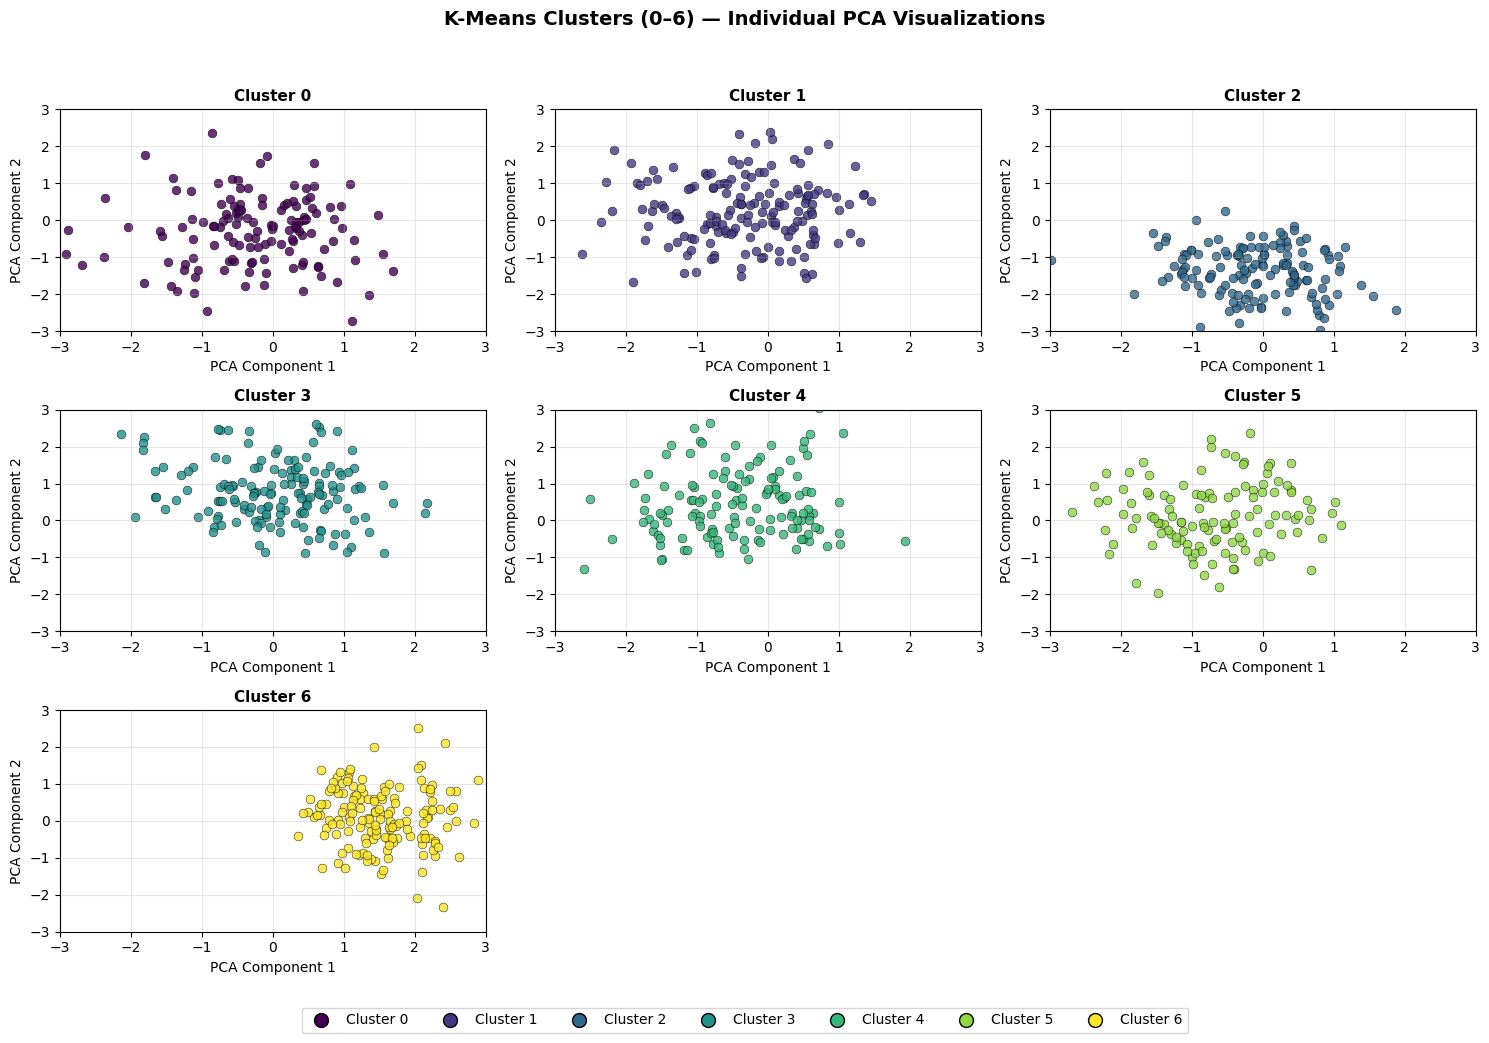

✅ Saved: clusters_individual_pca_0_to_6.png


In [ ]:
# VISUALIZING ALL CLUSTERS (0–6) IN PCA SPACE — UPDATED VERSION

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib as mpl

# STEP 1: Load Clustered Dataset

df = pd.read_csv("clustered_preprocessed_plant_data.csv")

# Separate features (X) and cluster labels
X = df.drop(columns=["Health_Score", "Cluster"], errors='ignore')
clusters = df["Cluster"]

# STEP 2: Apply PCA for Dimensionality Reduction

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Add PCA components to the dataframe
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]


# STEP 3: Prepare Plot Grid and Colors

# Define all cluster labels (0–6)
unique_clusters = list(range(7))  # explicitly handle clusters 0–6
n_clusters = len(unique_clusters)

# Arrange subplots (3 columns per row)
cols = 3
rows = (n_clusters + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

# ✅ Modern color handling (Matplotlib ≥ 3.7)
base_cmap = mpl.colormaps["viridis"]
colors = [base_cmap(i / (n_clusters - 1)) for i in range(n_clusters)]

# STEP 4: Plot Each Cluster Individually

for i, cluster in enumerate(unique_clusters):
    ax = axes[i]

    # Filter samples for this cluster
    subset = df[df["Cluster"] == cluster]

    # Scatter plot for this cluster
    ax.scatter(subset["PCA1"], subset["PCA2"],
               s=40, color=colors[i], alpha=0.8,
               edgecolor="k", linewidth=0.4)

    ax.set_title(f"Cluster {cluster}", fontsize=11, fontweight="bold")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")

    # Keep consistent scale for fair comparison
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xticks(range(-3, 4))
    ax.set_yticks(range(-3, 4))
    ax.grid(alpha=0.3)

# STEP 5: Hide Empty Subplots (if any)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# STEP 6: Add Color Legend and Title

# Create legend handles manually
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=colors[i], markersize=10,
                      markeredgecolor='k', label=f"Cluster {i}")
           for i in range(n_clusters)]

fig.legend(handles=handles, loc='lower center', ncol=n_clusters,
           bbox_to_anchor=(0.5, -0.05), fontsize=10)

plt.suptitle("K-Means Clusters (0–6) — Individual PCA Visualizations",
             fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# STEP 7: Save and Show

plt.savefig("clusters_individual_pca_0_to_6.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Saved: clusters_individual_pca_0_to_6.png")

In [9]:
# ============================================================
# 📘 CLUSTERING ANALYSIS SUMMARY (K-MEANS)
# ============================================================
# The K-Means clustering algorithm was applied to the preprocessed
# plant dataset to identify groups of samples with similar environmental
# and growth characteristics. Using standardized features, the optimal
# number of clusters was determined to be k = 7 based on the Silhouette Score.
#
# The final model achieved a Silhouette Score of 0.0630 and a
# Davies–Bouldin Index of 2.4941. These values suggest that while
# some overlap exists between groups, there are still identifiable
# patterns in the data.
#
# The clusters revealed meaningful groupings based on variations
# in watering frequency, soil moisture, humidity, and temperature —
# distinguishing between well-hydrated plants, drought-tolerant species,
# and nutrient-demanding groups.
#
# A 2D PCA projection (fixed scale -3 to +3) was used to visualize the
# clusters, showing moderate separation with areas of overlap.
# Overall, K-Means provided the clearest segmentation of the dataset,
# offering insights into how environmental factors collectively influence
# plant health and growth performance.
# ============================================================